In [33]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score



In [17]:
# Reading the dataset
titanic = pd.read_csv('titanic.csv')

In [18]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Gender
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583,1
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,1
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750,1
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333,0
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708,0


In [19]:
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Gender
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000,887.000000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542,0.645998
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204,0.478480
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920,1.000000


In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
 8   Gender                   887 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.5+ KB


In [21]:
#категоризирую пол
titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})

# #Создаю новый параметр Female size
# titanic['Female size'] = titanic[['Siblings/Spouses Aboard', 'Parents/Children Aboard']].sum(axis=1)

#определяю X как титаник без выживших и имени, потому что они не нужны, и y как выживших    
X, y =titanic.drop(['Survived', 'Name'], axis=1), titanic['Survived']

X.shape,y.shape

((887, 7), (887,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [37]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidian')
knn2 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')


In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred = knn.predict(X_test)

In [34]:
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1_macro')
scores

array([0.76147816, 0.75601375, 0.81478261, 0.92209787, 0.81117021,
       0.87863248, 0.73992674, 0.76629361, 0.85426929, 0.82731554])

In [35]:
scores.mean()

0.8131980270371368

In [38]:
scores2 = cross_val_score(knn2, X_train, y_train, cv=10, scoring='f1_macro')
scores2

array([0.76629361, 0.76629361, 0.85058923, 0.89291101, 0.83442866,
       0.86453254, 0.7477534 , 0.78760684, 0.80949432, 0.83300802])

In [39]:
scores2.mean()

0.8152911250713487

In [27]:
print(confusion_matrix(y_test, y_pred))

[[96 15]
 [22 45]]


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       111
           1       0.75      0.67      0.71        67

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



In [29]:
accuracies = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(np.mean(y_pred == y_test))

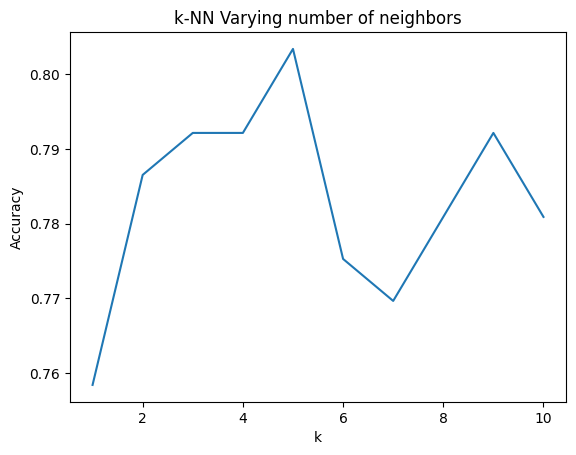

In [30]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Varying number of neighbors')
plt.show()